# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split as tts


In [7]:
# Your code here. 
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values})
student_data.index = student_data.index + 1
student_data.index.name = 'StudentID'

In [8]:
student_data

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

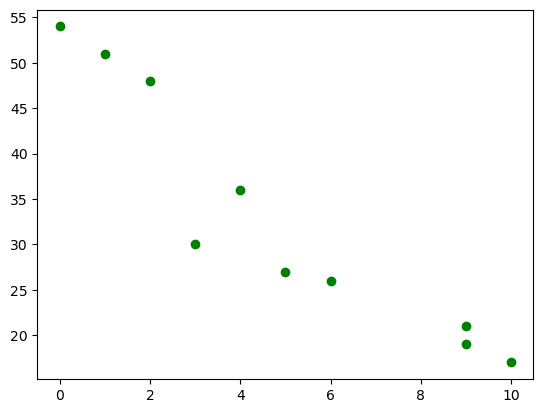

In [9]:
# Your code here.
scatter_plot = plt.scatter(y_values, x_values, color='green')


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
'''A mayor valor de edad menor valor en los retrasos al llegar a clase'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [11]:
# Your response here.
covariance = student_data['Age'].cov(student_data['Tardies'])
correlation = student_data['Age'].corr(student_data['Tardies'])

In [12]:
covariance, correlation

(-45.56666666666667, -0.9391626886887122)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Your response here.
X = sm.add_constant(student_data.Age)
y = student_data.Tardies
modelo = sm.OLS(y, X).fit()
modelo.summary()

/Users/davidledo/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        00:04:48   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

In [15]:
# Your code here.
modelo.predict()

array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
        1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024])

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

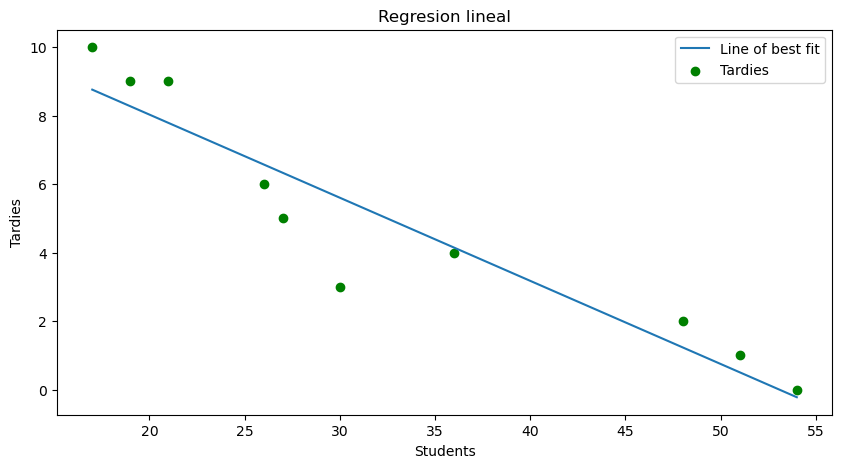

In [16]:
# Your response here. 
X = np.linspace(student_data.Age.min(), student_data.Age.max(), 50)

# Del output de arriba podemos sacar el coeficiente beta y la constante. Ya hemos dicho antes que la regresión lineal es de la forma y = mx + b
y = -0.2428*X + 12.8888

plt.figure(figsize=(10, 5))

plt.plot(X, y, label='Line of best fit')

plt.scatter(student_data.Age, y = student_data.Tardies, marker='o', c='g', label='Tardies')

plt.title('Regresion lineal')
plt.xlabel('Students')
plt.ylabel('Tardies')
plt.legend()
plt.show();

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [20]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [21]:
# Your response here. 
columnas = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
df = vehicles[columnas]

correlations = df.corr()['CO2 Emission Grams/Mile']

correlations

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

In [22]:
'''Mucha correlación positiva con Fuel Barrels/Year y con Fuel Cost/Year. 
Alta correlación negativa con Combined MPG.
No se encuentra correlación con la columna Year'''

'Mucha correlación positiva con Fuel Barrels/Year y con Fuel Cost/Year. \nAlta correlación negativa con Combined MPG.\nNo se encuentra correlación con la columna Year'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [28]:
# Your response here. 
# defino las características y la variable objetivo
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

# divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# creo un modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo en el conjunto de entrenamiento
modelo.fit(X_train, y_train)

# Generar predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)
predicciones

array([342.67725676, 516.83769373, 437.23698384, ..., 480.32478744,
       471.42274244, 587.67179739])

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [32]:
# Your response here. 

# agrego una constante a las características para el término de intercepción
X_sm = sm.add_constant(X_train)

# creo un modelo de regresión OLS
modelo_sm = sm.OLS(y_train, X_sm)

# ajusto el modelo
resultado = modelo_sm.fit()

resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.005e+05
Date:                     Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                             00:29:18   Log-Likelihood:            -1.2113e+05
No. Observations:                    28761   AIC:                         2.423e+05
Df Residuals:                        28755   BIC:                         2.423e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               755.6935     21.507     35.137      0.000     713.539     797.848
Year                 -0.3156      0.011    -29.360      0.000      -0.337      -0.295
Cylinders             1.7940      0.092     19.497      0.000       1.614       1.974
Fuel Barrels/Year    19.2310      0.068    281.981      0.000      19.097      19.365
Combined MPG         -2.9336      0.047    -62.750      0.000      -3.025      -2.842
Fuel Cost/Year        0.0320      0.001     59.724      0.000       0.031       0.033
==============================================================================
Omnibus:                    58182.680   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        238983414.038
Skew:                          16.711   Prob(JB):                         0.00
Kurtosis:                     448.315   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
'''Se puede observar por que por cada año que pasa la emisión de CO2 disminuye en 0.3156 gramos por milla'''

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 